In [4]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [5]:

# this is our input placeholder
input_img = Input(shape=(784,))


In [6]:
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [7]:
# Define the second hidden layer
hidden_layer = Dense(64, activation='relu')(encoded)

In [8]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [9]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 5s 16ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 2/5
235/235 [==============================] - 4s 17ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 3/5
235/235 [==============================] - 4s 17ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 4/5
235/235 [==============================] - 4s 19ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 5/5
235/235 [==============================] - 4s 17ms/step - loss: 0.6939 - val_loss: 0.6938


Epoch 1/10
235/235 [==============================] - 7s 26ms/step - loss: 0.6989 - val_loss: 0.6987
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.6985 - val_loss: 0.6983
Epoch 3/10
235/235 [==============================] - 6s 24ms/step - loss: 0.6982 - val_loss: 0.6980
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.6978 - val_loss: 0.6977
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.6975 - val_loss: 0.6973
Epoch 6/10
235/235 [==============================] - 7s 29ms/step - loss: 0.6972 - val_loss: 0.6970
Epoch 7/10
235/235 [==============================] - 4s 19ms/step - loss: 0.6969 - val_loss: 0.6967
Epoch 8/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6966 - val_loss: 0.6964
Epoch 9/10
235/235 [==============================] - 5s 22ms/step - loss: 0.6963 - val_loss: 0.6961
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


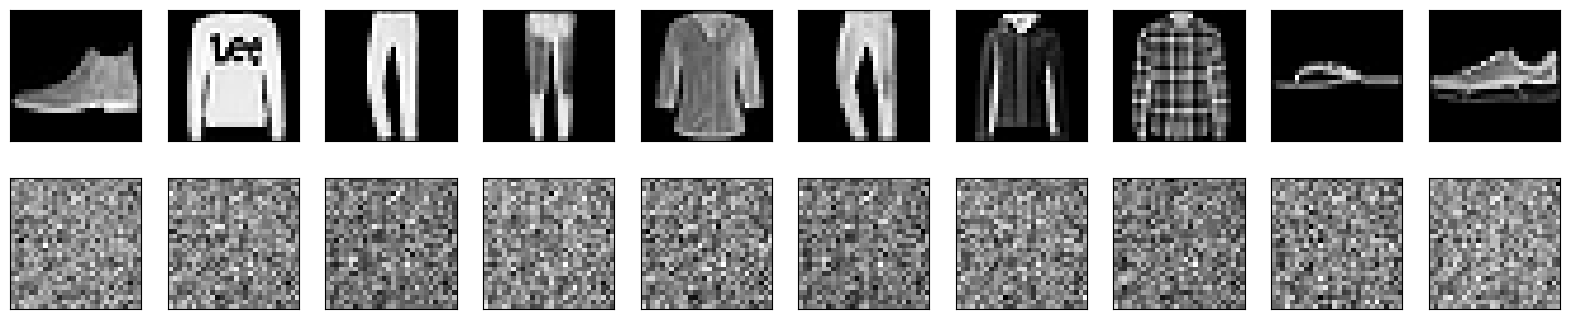

In [14]:
#2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
# Also, visualize the same test data before reconstruction using Matplotlib
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))
# Predict on test data
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

# Visualize one of the reconstructed versions of the test data
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 2ms/step


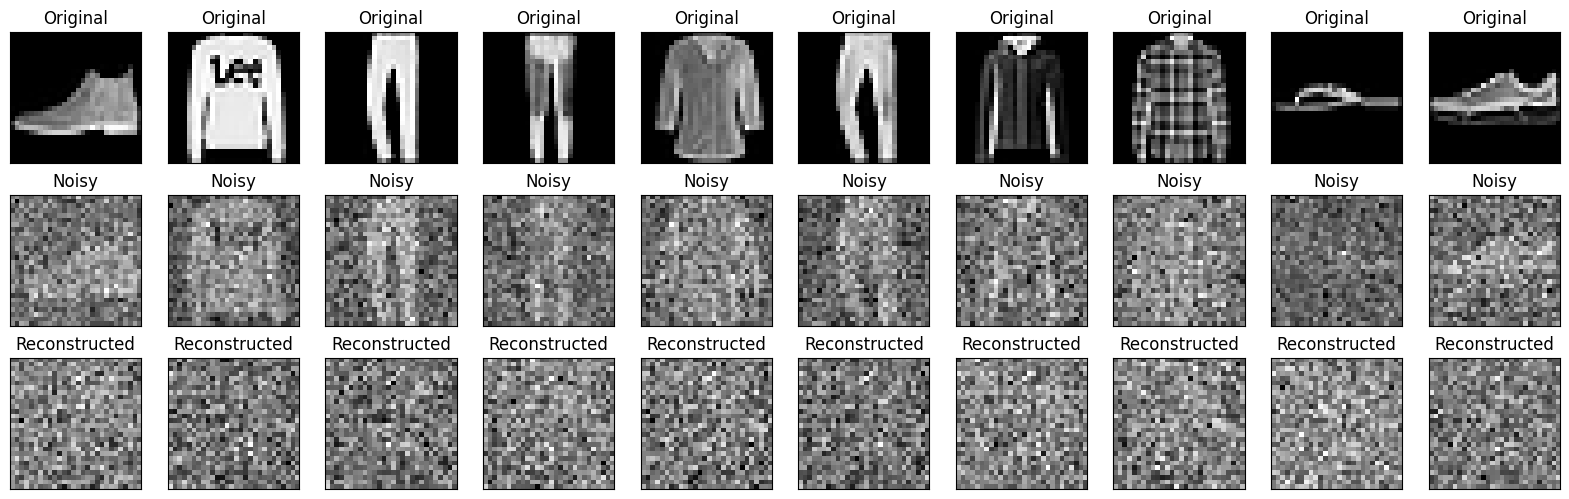

In [15]:
#Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
#Also, visualize the same test data before reconstruction using Matplotlib
# Repeat the question 2 on the denoisening autoencoder


# Predict on the test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize original, noisy, and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original Images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title('Original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy Images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title('Noisy')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title('Reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/10
235/235 [==============================] - 6s 23ms/step - loss: 0.6957 - val_loss: 0.6956
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.6955 - val_loss: 0.6953
Epoch 3/10
235/235 [==============================] - 5s 19ms/step - loss: 0.6952 - val_loss: 0.6951
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.6950 - val_loss: 0.6948
Epoch 5/10
235/235 [==============================] - 6s 25ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 6/10
235/235 [==============================] - 8s 35ms/step - loss: 0.6945 - val_loss: 0.6943
Epoch 7/10
235/235 [==============================] - 5s 22ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 8/10
235/235 [==============================] - 4s 17ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 9/10
235/235 [==============================] - 6s 27ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 10/10
235/235 [==============================] - 6s 26ms/step - loss: 0.6935 - val_lo

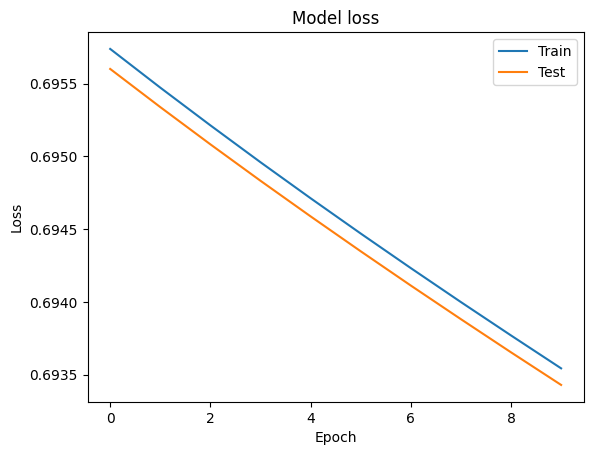

In [16]:
history = autoencoder.fit(x_train_noisy, x_train,
                           epochs=10,
                           batch_size=256,
                           shuffle=True,
                           validation_data=(x_test_noisy, x_test_noisy))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()